In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image
import os 
from tensorflow import keras
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Activation, Flatten, Dropout

In [9]:
data = []
labels = []
classes = 43
cur_path = os.getcwd() + "\Dataset\Train";
for i in range(classes):
    path = cur_path + '//' +str(i)
    for x in os.listdir(path):
        if x.endswith(".png"):
            # Prints only text file present in My Folder     
            try:
                image = Image.open(path + '//'+ x)

                image = image.resize((30,30))
                image = np.array(image)
                x = np.array(x)

                data.append(image)
                labels.append(i)
            except:
                print("Error loading image")

data = np.array(data)
labels=np.array(labels)

In [10]:
print(data.shape,labels.shape)

(39209, 30, 30, 3) (39209,)


In [11]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=27)
print(" X_train shape: ", X_train.shape, "\n", "X_test shape: ", X_test.shape,"\n", "y_train shape: ", y_train.shape, "\n", "y_test shape: ", y_test.shape)

 X_train shape:  (31367, 30, 30, 3) 
 X_test shape:  (7842, 30, 30, 3) 
 y_train shape:  (31367,) 
 y_test shape:  (7842,)


In [12]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train,43) 
y_test = to_categorical(y_test,43)

In [13]:
# Now let's build cnn model using Keras
#Building the model
model = Sequential()
# Adding First layer
model.add(Conv2D(filters= 32 , kernel_size= (5,5), activation='relu', input_shape = X_train.shape[1:]))
model.add(Conv2D(filters= 32 , kernel_size= (5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate = 0.25))
# Adding second layer
model.add(Conv2D(filters= 64 , kernel_size= (3,3), activation='relu'))
model.add(Conv2D(filters= 64 , kernel_size= (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate = 0.25))
model.add(Flatten())
# Adding Dense Layer
model.add(Dense(256,activation= 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(43,activation = "softmax"))
"""Training and validation"""

# Lets compile our model now
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

c:\Users\itzme\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
anc = model.fit(X_train,y_train,batch_size=32,epochs=15, validation_data=(X_test,y_test))

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.4127 - loss: 2.8209 - val_accuracy: 0.9532 - val_loss: 0.1900
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8869 - loss: 0.4275 - val_accuracy: 0.9793 - val_loss: 0.0767
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9323 - loss: 0.2560 - val_accuracy: 0.9796 - val_loss: 0.0861
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9363 - loss: 0.2391 - val_accuracy: 0.9787 - val_loss: 0.0857
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9487 - loss: 0.1953 - val_accuracy: 0.9830 - val_loss: 0.0645
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9521 - loss: 0.1846 - val_accuracy: 0.9866 - val_loss: 0.0505
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9562 - loss: 0.1769 - val_accuracy: 0.9884 - val_loss: 0.0437
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9460 - loss: 0.2257 - 

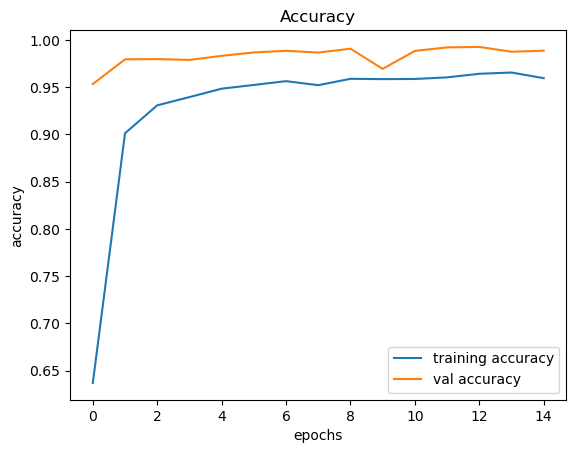

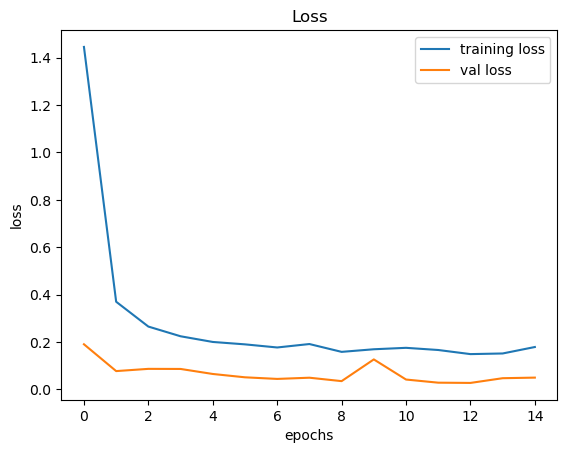

In [16]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [21]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
   image = Image.open(img)
   image = image.resize((30,30))
   data.append(np.array(image))
X_test=np.array(data)
pred = model.predict_classes(X_test)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [26]:
from sklearn.metrics import accuracy_score
import numpy as np
from PIL import Image

# Predict classes
pred_probs = model.predict(X_test)
pred = np.argmax(pred_probs, axis=-1)

# Convert one-hot encoded y_test back to class labels
true_labels = np.argmax(y_test, axis=-1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, pred)
print(f"Accuracy on test set: {accuracy}")


246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Accuracy on test set: 0.9885233358837031


In [28]:
model.save("traffic_classifier.h5")